# The case study: "No maximum at the R2-curve"
## Author 
 Olga Krasotkina for MPI

## Problem statement
In some cases the PR2 curve is monotonic and has not any extremum and sugessts very large  optimal smoothness tending to the full stationary betas. 

## Source data

There are 12 indicies an 158 funds for 60 time points from 2015-03-29 till 2015-06-12. 


## Solution 2: Change the model dynamic  

Now the coefficient vectors should be assumed to obey a linear dynamic model $\boldsymbol{\beta}_{t} = \boldsymbol{\beta} _{\,t - 1} + \boldsymbol{\varepsilon }_{t}$, where the $\boldsymbol{\varepsilon }_{t}$ is the white noise with independent components. But in many cases the data to be analysed are highly correlated and the assumption about the independent components is not satisfied. The hypotesis consist in that there are a few  factors controling  all indicies . Under these assumtion the smoothness term in the criterion change to the ${(\boldsymbol{\beta}_{t} - \boldsymbol{\beta}_{t-1})^T}{{\bf{A}}}^T{{\bf{U}}}{{\bf{A}}}(\boldsymbol{\beta}_{t} - \boldsymbol{\beta}_{t-1})$, where $\bf{A}$ has sizes $[m,n]$, $m < n$, $m$ - number of independent factors in model, $n$ - number of assets. smoothness matrix $\bf{U} = \lambda \bf {I}$ has the sizes $[m, m]$. $m$ and $\lambda $  are the structual parametrs of model.




##  Import packages



In [7]:
import pandas as pd
import numpy as np
import scipy as sc
import Regress as nsr
import math
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib notebook

## Import data




In [8]:
fund_data = pd.read_excel('SmoothnessData.xlsx','Sheet1')
assets_data = pd.read_excel('SmoothnessData.xlsx','Sheet2')
#assets_data

In [9]:
fundstbl = fund_data.iloc[2:62,0:158].values
assetstbl = assets_data.iloc[2:62,0:12].values
dates = assets_data.iloc[2:62].index.date
assetsall = np.mat(assetstbl)
fundsall = np.mat(fundstbl)
n = np.size(assetsall,1)
T = np.size(assetsall,0)
print(n)
print(T)

12
60


## A look at the returns

<IPython.core.display.Javascript object>


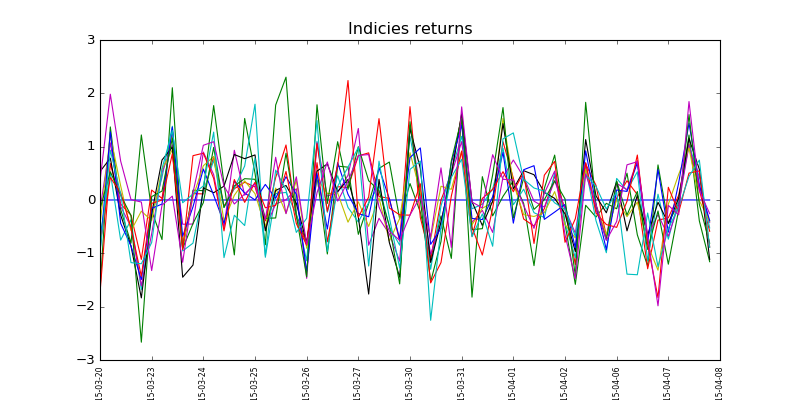

In [4]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)






time =  range(T)
plt.figure(figsize=(10,5)) 
plt.title('Indicies returns')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)


ax.get_xaxis().set_major_locator(majorLocator)

#plt.subplot(3,1,1)
for i in range(0,n):
    plt.plot(time, assetsall[:,i])
plt.show()

## Set parameters

In [10]:
# set smoothness
lam = 0.01

# fund
fnum = 0

# indicies
index_array = np.arange(12)
index_array = np.array([1,2,3,4,5,6,7,8,9,10,11])
#index_array = np.array([10,11])
print(index_array)
# set model matrix
dynamic_model = 0

[ 1  2  3  4  5  6  7  8  9 10 11]


## LOO procedure  for new dynamic model

<IPython.core.display.Javascript object>


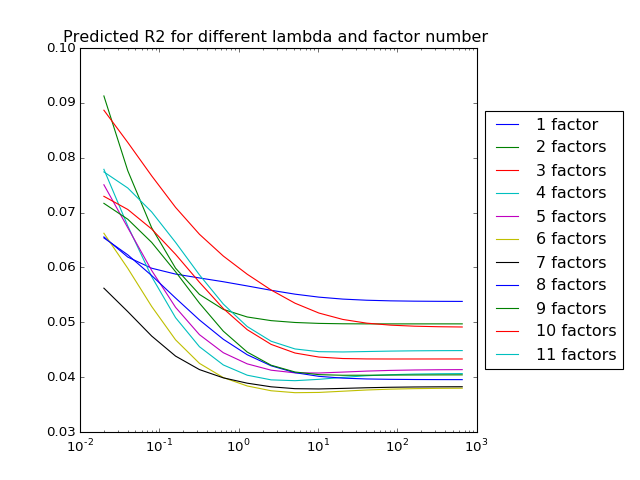

6 5.12 0.0371670051993


<IPython.core.display.Javascript object>


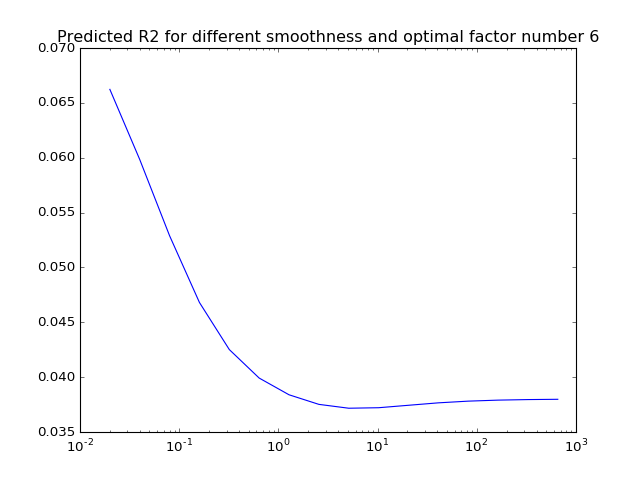

<IPython.core.display.Javascript object>


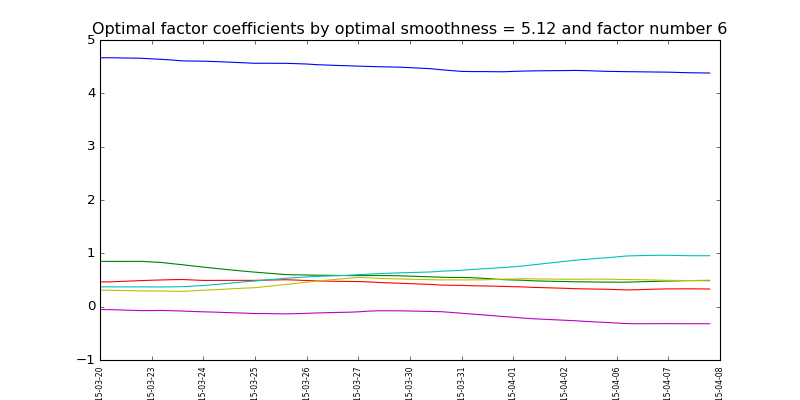

<IPython.core.display.Javascript object>


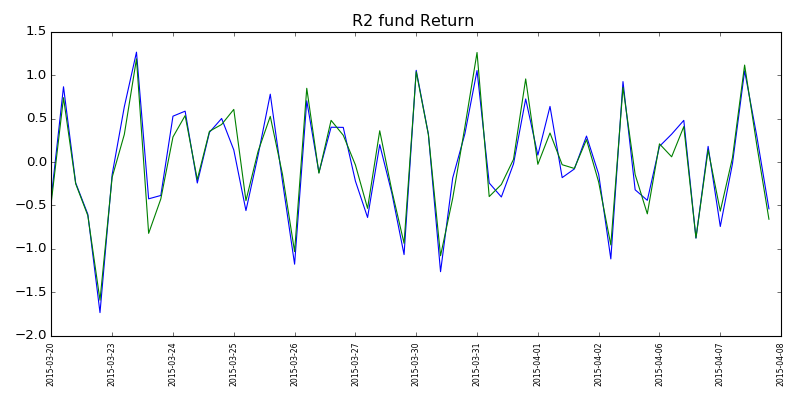

In [13]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)



assetss  = assetsall[:,np.array([1,2,3,4,5,6,7,8,9,10,11])] 

n = np.size(assetss,1)
T = np.size(assetss,0)
A  = np.zeros([T,T])
for i in range(0,n):
    A = A + assetss[:,i] * assetss[:,i].T
#print(XXT)
eigvals, eigenvec = np.linalg.eig(A.astype("float64"))

ind = np.argsort(eigvals,)
ind = ind[::-1]
eigenvec = eigenvec[:, ind]
eigvals = eigvals[ind]
eigenvec =eigenvec.real

time =  range(T)
outPoint = np.zeros([T,1])
fund = fundsall[:,fnum]



lam_arr = []
lam = 0.01
while lam <=500:
        lam = lam*2
        lam_arr.append(lam)
plt.close("all")

plt.figure()
plt.title('Predicted R2 for different lambda and factor number ')
ax = plt.gca()
ax.set_xscale('log')


m_max = 11
r2_min = 1000
m_min  = 0
lam_min = 0
r2_lam_arr = np.zeros([m_max,len(lam_arr)]) 

for m in range(0,m_max):
        assets_ort = eigenvec[:,range(0,m+1)]
        n = np.size(assets_ort,1)
        T = np.size(assets_ort,0)       
        
        ilam = 0
        
        for lam in lam_arr:
             r2_arr, r2_lam, fund_out = nsr.LeaveOneOut(assets_ort,fund,lam,dynamic_model)
             r2_lam_arr[m,ilam] = r2_lam 
             ilam = ilam+1
             if r2_lam <= r2_min:           
                r2_min = r2_lam
                m_min = m
                lam_min  = lam
        if m == 0: 
          series_labl =  str(m+1) + ' factor'
        else:
          series_labl =  str(m+1) + ' factors'  
        plt.plot(lam_arr,r2_lam_arr[m,:], label = series_labl)
box = ax.get_position()

ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()        
print m_min+1, lam_min, r2_min


plt.figure()
title = 'Predicted R2 for different smoothness and optimal factor number ' + str(m_min+1)
plt.title(title)
ax = plt.gca()
ax.set_xscale('log')
plt.plot(lam_arr,r2_lam_arr[m_min,:], label = series_labl)
plt.show()

assets_ort = eigenvec[:,range(0,m_min+1)]
beta_opt_lam, fund_est = nsr.nonstatRegress(assets_ort,fund, lam_min, outPoint,dynamic_model)
plt.figure(figsize=(10,5))
title = 'Optimal factor coefficients by optimal smoothness = ' + str(lam_min) + ' and factor number ' + str(m_min+1) 
plt.title(title)
for i in range(0,m_min+1):
    plt.plot(time, beta_opt_lam[:,i])
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)  
plt.show()

# Plot  return
plt.figure(figsize=(10,5))
plt.title('R2 fund Return ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, fund)
plt.plot(time, fund_est)
plt.tight_layout() 

plt.show()